# Deep Learning Notes

Zhang Weiliang

Creative Commons License

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* [Backpropagation](#backprop)
* [Batch Normalization](#batchnorm)

## Essential Formulae

Definitions first:

### Logistic Sigmoid

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

The widespread of saturation of sigmoid function can make gradient-based learning very difficult. Thus their use as hidden units in feedforward networks is now **discouraged**.

The use as output units is compatible with the use of gradient-based learning when an appropriate cost function can **undo** the saturation.

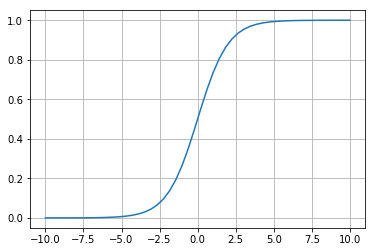

In [13]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

n = np.linspace(-10, 10, 50)
out = sigmoid(n)

plt.plot(n, out)

### Softplus

$$ \zeta(x) = \log(1 + e^x) $$

The use as hidden units is **discouraged**.

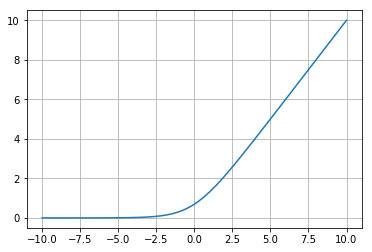

In [14]:
def softplus(x):
    return np.log(1 + np.exp(x))

n = np.linspace(-10, 10, 50)
out = softplus(n)

plt.plot(n, out)

## Properties of Sigmoid & Softplus functions
Derivations for Page 67 formulae. 

### 3.33. 

$$
\begin{aligned}
\sigma(x) =& \frac{e^x}{e^x} \times \frac{1}{1 + e^{-x}} \\
=& \frac{e^x}{e^x(1 + e^{-x})} \\
=& \frac{e^x}{e^x + 1}
\end{aligned}
$$

### 3.34. 

Let $y = e^{-x}$, $z = 1 + y$, then we have $\sigma(x) = z^{-1} $.

$$
\begin{aligned}
\frac{d}{dx}\sigma(x) =& \frac{d\sigma}{dz} \times \frac{dz}{dy} \times \frac{dy}{dx} \\
=& -z^{-2} \times 1 \times -e^{-x} \\
=& -(1 + e^{-1})^{-2} \times -e^{-x} \\
=& \frac{e^{-x}}{(1 + e^{-1})^{2}} \\
=& \frac{1}{1 + e^{-1}} \times \frac{e^{-x}}{1 + e^{-1}} \\
=& \sigma(x) (1-\sigma(x))
\end{aligned}
$$

### 3.35.

$$
\begin{aligned}
1 - \sigma(x) =& 1 - \frac{1}{1 + e^{-x}}\\
=& \frac{1 + e^{-x} - 1}{1 + e^{-x}} \\
=& \frac{e^{-x}}{1 + e^{-x}} \\
=& \frac{1}{e^x + 1} \\
=& \sigma(-x)
\end{aligned}
$$

### 3.36.

$$
\begin{aligned}
\log(\sigma(x)) &= \log\big(\frac{1}{1 + e^{-x}}\big) \\
&= \log(1) - \log(1 + e^{-x}) \\
&= -\log(1 + e^{-x}) \\
&= -\zeta(-x)
\end{aligned}
$$

### 3.37.

Let $u = 1 + e^x$, hence $\zeta(x) = \log(u)$, then

$$
\begin{aligned}
\frac{d}{dx}\zeta(x) =& \frac{d\zeta}{du} \times \frac{du}{dx} \\
&= \frac{1}{u} \times e^x \\
&= \frac{e^x}{1 + e^x} \\
&= \frac{1}{e^{-x} + 1} \\
&= \sigma(x)
\end{aligned}
$$

### 3.38.

**Logit function**, for $ \forall x \in (0, 1)$:

$$ \sigma^{-1}(x) = \log\bigg(\frac{x}{1-x}\bigg) $$

Here the power of -1 does not mean reciprical, but the **inverse**. Eg. given $\sigma(x)$, find $x$. 

$$
\begin{aligned}
\sigma(x) &= \frac{1}{1 + e^{-x}} \\
1 + e^{-x} &= \frac{1}{\sigma(x)} \\
e^{-x} &= \frac{1}{\sigma(x)} - 1 \\
-x &= \log\bigg(\frac{1-\sigma(x)}{\sigma(x)}\bigg) \\
x &= -\log\bigg(\frac{1-\sigma(x)}{\sigma(x)}\bigg) \\
x &= \log\bigg(\frac{\sigma(x)}{1-\sigma(x)}\bigg)
\end{aligned}
$$

In [8]:
def logit(x):
    return np.log(x / (1.-x))

logit(.6)

0.40546510810816422

In [12]:
sigmoid(logit(.6))

0.59999999999999998

### 3.39.

Inverse of $\zeta(x)$, let $u=\zeta(x)$:

$$
\begin{aligned}
u &= \log(1 + e^x) \\
e^u &= 1 + e^x \\
e^x &= e^u - 1 \\
\forall x &> 0 \text{, take log on both sides} \\
x &= \log\big( e^u -1 \big)
\end{aligned}
$$

### 3.40.

$$
\begin{aligned}
\int^{x}_{-\infty} \sigma(y)dy &= \int^{x}_{-\infty} \frac{1}{1 + e^{-y}} \\
&= \log \big \lvert 1 + e^{-y} \big \rvert + y \\
&= \log \big ( \frac{e^y + 1}{e^y} \big ) + y \\
&= \log(e^y + 1) - \log(e^y) + y \\
&= \log(e^y + 1)
\end{aligned}
$$

Key here is the integration part. Results can be checked with `SymPy`. Or, to reverse that back:

$$
\begin{aligned}
\frac{d}{dx}\big(\log(1 + e^{-x}) + x\big) &= \frac{1}{1+e^{-x}} \times -e^{-x} + 1 \\
&= \frac{1 + e^{-x} - e^{-x}}{1 + e^{-x}} \\
&= \sigma(x)
\end{aligned}
$$

In [14]:
import sympy as spy

In [16]:
y = spy.Symbol('y')

spy.integrate(1 / (1 + spy.exp(-y)))

y + log(1 + exp(-y))

In [17]:
spy.diff(1 / (1 + spy.exp(-y)))

exp(-y)/(1 + exp(-y))**2

In [18]:
spy.diff(y + spy.log(1 + spy.exp(-y)))

1 - exp(-y)/(1 + exp(-y))

### 3.41

$$
\begin{aligned}
\zeta(x)-\zeta(-x) &= \log(1 + e^x) - \log(1 + e^{-x}) \\
&= \log\bigg(\frac{1 + e^x}{1 + e^{-x}}\bigg) \\
&= \log\bigg(\frac{e^{-x}(1 + e^x)}{e^{-x}(1 + e^{-x})}\bigg) \\
&= \log\bigg(\frac{e^{-x} + 1}{e^{-x}(1 + e^{-x})}\bigg) \\
&= \log\bigg(\frac{1}{e^{-x}}\bigg) \\
&= \log(e^x) \\
&= x
\end{aligned}
$$

## Derivatives

**Product Rule**

$$ (u \cdot v)' = u' \cdot v + u \cdot v'$$

** Quotient Rule**

$$ \bigg(\frac{u}{v}\bigg)' = \frac{u'v - uv'}{v^2} $$

### Softmax Function, p78

$$ softmax(x)_i = \frac{\exp(x_i)}{\sum_{j=1}^{n} \exp(x_j)} $$

Overflow when $x_i$ is very large, underflow when $x_i$ is very negative. Solution is to use $softmax(z)$, where:
$z = x - max_i x_i$.

**Derivative of Softmax**

Using quotient rule, let $u=e^{x_i}$ and $v=\sum_{j=1}^{n} e^{x_j}$:

$$
\begin{aligned}
u' &= e^{x_i} \\
\frac{\partial v}{\partial x_j} &= e^{x_j} \\
S_i' = softmax'(x_i) &= \frac{u'v - uv'}{v^2} \\
&= \frac{e^{x_i} \cdot v - e^{x_i} e^{x_j}}{v^2}
\end{aligned}
$$

When $i = j$:

$$
\begin{aligned}
S_i' = softmax'(x_i) &= \frac{e^{x_i} \cdot v - e^{x_i}e^{x_i}}{v^2} \\
&= \frac{e^{x_i} (v - e^{x_i})}{v^2} \\
&= \frac{e^{x_i}}{v} \times \frac{v - e^{x_i}}{v} \\
&= S_i (1-S_i)
\end{aligned}
$$

When $i \neq j$:

$$
\begin{aligned}
\frac{\partial u}{\partial x_j} &= 0 \\
S_j' = softmax'(x_i) &=  \frac{0 \cdot v - e^{x_i}e^{x_j}}{v^2} \\
&= -\frac{e^{x_i}}{v}\frac{e^{x_j}}{v} \\
&= S_i S_j
\end{aligned}
$$

In terms of delta function:

$$
\begin{aligned}
\delta_{ij} &= \begin{cases}
1 & i=j\\
0 & i\neq j
\end{cases} \\
S' &= S_i (\delta_{ij} - S_j)
\end{aligned}
$$

This is very similar to the derivative of sigmoid. Good [post](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/) on this topic.

Typical softmax is used in a **Negative-Log-Likelihood (NLL)** loss function [Andrej's blog](http://cs231n.github.io/neural-networks-case-study/#grad):

$$ L_i = -\log S_i $$

Therefore in backprop:

$$
\begin{aligned}
\frac{\partial L_i}{\partial S_i} &= - 1/S_i \\
\frac{\partial S_i}{\partial x_i} &= S_i(\delta_{ij} - S_j) \\
\frac{\partial L_i}{\partial x_i} &= -\frac{1}{S_i} \times S_i(\delta_{ij} - S_j) \\
&= S_j - \delta_{ij}
\end{aligned}
$$

### Poor Conditioning

Given function $f(x) = A^{-1}x$. When $A \in \mathbb{R}^{n \times n}$ has an **eigenvalue decomposition**, its **condition number** is:

$$ \max_{i,j} \bigg \lvert \frac{\lambda_i}{\lambda_j} \bigg \rvert $$

I.e. Ratio of largest and smallest eigenvalues.

Poor conditioning makes choosing a good optimization step size difficult.

## Hessian Matrix & Min/Max/Saddle Points

At a **critical point** where $\triangledown_x f(x) = 0$:

* **Local minimum** if the Hessian matrix is **positive definite** (i.e. all of its eigenvalues are positive).
* **local maximum** if the Hessian matrix is **negative definite** (i.e. all of its eigenvalues are negative).
* **Inconclusive** if all non-zero eigenvalues have the same sign but **at least one eigenvalue is zero**.



# Chapter 5

**Representational Capacity**, p110, The model specifis which family of functions the learning algorithm can choose from when varying the parameters in order to reduce a training objective. 

**Effective Capacity** can be limited by imperfections of the optimization algorithm, which means it may be less than the representational capacity.

## Vapnik-Chervonenkis (VC) Dimension, p111

VC dimension measres the capacity of a binary classifier. Defined as being the lagest possible value of $m$ for which there exists a training set of $m$ different $x$ points that the classifier can label arbitrarily.

The most important results in statistical learning theory show that the discrepancy between the trainnig error and generalization error is bounded from above by a quantity that grows as the model capacity grows but shrinks as the number of traning examples increase. 

However, this is rarely used in practice when working with deep learning algos. Because:
* it can be quite difficult to determine the capacity of deal learning algos.
* The problem of determining the capacity of deep learning models is especially difficult because the effective capacity is limited by the capabilities of the optimization algorithm. 
* we have little theoretical understanding of the general non-convex optimization problems involved in deep learning.

Typically training error decreases until it asymptotes to the minimum possible error value as model capacity increases (assuming the error measure has a minimum value); generalization error typically has a U-shaped curve as a function of model capacity.

**No Free Lunch theorem**: averaged over all possible data-generating distributions, every classification algothrim has the same error rate when classifying previously unobserved points. 

**Goal** is to understand what kind of distributions are relevant to the real world that an AI agent experiences, and what kind of machine learning algorithem perform well on data drawn from the kinds of data-generating distributions we care about.

## Estimator, Bias and Variance

Sample variance, unbiased sample variance, both underestimates the true standard deviation but are still used in practice. Unbiased sample variance is less of an underestimate. For large sample size $m$, the approximation is quite reasonable.

## Maximum Likelihood Estimation

$$
\begin{aligned}
\theta_{ML} &= \underset{\theta}{\operatorname{arg max}} p_{model}(\mathbb{X}; \theta) \\
&= \underset{\theta}{\operatorname{arg max}}\Pi_{i=1}^{m}p_{model}(x^{(i)}; \theta) \\
&= \underset{\theta}{\operatorname{arg max}}\sum_{i=1}^m \log p_{model}(x^{(i)}; \theta) \\
D_{KL}(\hat{p}_{data} \lVert p_{model}) &= \mathbb{E}_{x \sim \hat{p}_{data}} \bigg[ \log \hat{p}_{data}(x) - \log p_{model}(x)\bigg] \\
\end{aligned}
$$

Therefore minimizing KL divergence corresponds exactly to minimzing the cross-entropy between the distributions.

**Appropriate Conditions** for maximum likelihood estimator to have the property of **consistency**:

* The true distribution $p_{data}$ must lie within the model family $p_{model}(.;\theta)$, otherwise, no estimator can recover $p_{data}$.

* The true distribution $p_{data}$ must corresond to example one value of $\theta$. Otherwise maximum likelihood can recover the correct $p_{data}$ but will not be able to determine which value of $\theta$ was used by the data-generating process.

For large sample size $m$, the **Cramer-Rao lower bound** shows that no consistent estimator has a lower Mean Square Error than the maximum likelihood estimator.'

## Linear Regression as Maximum Likelihood, p130

Univariate Gaussian PDF:

$$ PDF(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg) $$

A more efficient way to compute this is to define $\beta$, called **precision = inverse of variance**.

$$ PDF(x) = \sqrt{\frac{\beta}{2\pi}} \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg) $$

Multivariate Gaussian PDF:

$$ \mathcal{N}(x; \mu, \Sigma) = \sqrt{\frac{1}{(2\pi)^n \det(\Sigma)}} \exp\bigg( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \bigg) $$

Where $\Sigma$ is a **positive definite** symmetric matrix. 

In practice when this needs to be evaluated many times, we instead use a **precision matrix** $\beta = \Sigma^{-1}$:

$$ \mathcal{N}(x; \mu, \Sigma) = \sqrt{\frac{\det(\beta)}{(2\pi)^n}} \exp\bigg( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \bigg) $$

Conditional log-likelihood derivation:

$$
\begin{aligned}
&\sum_{i=1}^{m}\log p(y^{(i)} \mid x^{(i)};\theta) \\
=&\sum_{i=1}^{m}\log\bigg[\big(2\pi\sigma^2\big)^{-1/2}\exp\bigg(-\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2}\bigg)\bigg] \\
=& \sum_{i=1}^{m}\bigg\{-\frac{1}{2}\log\big(2\pi\sigma^2\big) + \log\bigg[\exp\bigg(-\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2}\bigg)\bigg]\bigg\} \\
=&\sum_{i=1}^{m}\bigg(-\frac{1}{2}\log\big(2\pi\sigma^2\big)\bigg) - \sum_{i=1}^{m}\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2} \\
=& -\frac{m}{2}\log\big( 2\pi \big) - m\log\sigma - \sum_{i=1}^{m}\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2} \\
\end{aligned}
$$

## Bayesian Regression, p134

Likelihood:

$$ p(y \mid X, w) \propto \exp\bigg[-\frac{1}{2}\big(y-Xw\big)^T \big(y-Xw\big)\bigg] $$

Prior:

$$ p(w) \propto \exp\bigg[ -\frac{1}{2}(w-\mu_0)^T\Lambda^{-1}_{0}(w-\mu_0) \bigg] $$

Posterior:

$$
\begin{aligned}
p(w \mid X, y) &\propto p(y \mid X, w)p(w) \\
&\propto \exp\bigg[-\frac{1}{2}\big(y-Xw\big)^T \big(y-Xw\big)\bigg] \exp\bigg[ -\frac{1}{2}(w-\mu_0)^T\Lambda^{-1}_{0}(w-\mu_0)\bigg] \\
&\propto \exp\bigg\{ -\frac{1}{2} \bigg[ y^Ty - y^TXw - w^T X^T y + w^T X^T X w  + w^T \Lambda^{-1}_{0}w - w^T\Lambda^{-1}_{0}\mu_0 -\mu^T_0 \Lambda^{-1}_{0}w + \mu^T_0 \Lambda^{-1}_{0}\mu_0 \bigg] \bigg\} \\
\because &\text{ } y^TXw = w^T X^T y,\text{ } \mu^T_0 \Lambda^{-1}_{0} w = w^T \Lambda^{-1}_{0}\mu_0 \\
\because &\text{ terms without } w \text{ can be ignored} \\
&\propto \exp\bigg\{ -\frac{1}{2} \bigg[-2y^TXw + w^T X^T X w  + w^T \Lambda^{-1}_{0}w - 2\mu^T_0 \Lambda^{-1}_{0}w \bigg] \bigg\} \\
\end{aligned}
$$

By setting:
$$
\begin{aligned}
\Lambda_m &= \big(X^T X + \Lambda^{-1}_0\big)^{-1} \\
\mu_m &= \Lambda_m \big(X^T y + \Lambda^{-1}_0 \mu_0\big) \\
& \therefore \\
\mu^T_m &= \big(X^T y + \Lambda^{-1}_0\mu_0\big)^T \Lambda^T_m  \\
\end{aligned}
$$

Also note $\Lambda^T_m = \Lambda_m$ as $\Lambda_m = diag(\lambda_m)$.

Rewrite posterior:
$$
\begin{aligned}
p(w \mid X, y) &\propto \exp\bigg(-\frac{1}{2}\big(w - \mu_m\big)^T \Lambda^{-1}_m \big(w - \mu_m\big)\bigg) \\
&\propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T\big(X^T X + \Lambda^{-1}_0\big)w - w^T\Lambda^{-1}_m\Lambda_m \big(X^T y + \Lambda^{-1}_0\mu_0 \big) -\big(X^T y + \Lambda^{-1}_0\mu_0 \big)^T\Lambda^T_m\Lambda^{-1}_m w \bigg]\bigg\} \\
&\propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T X^T X w + w^T \Lambda^{-1}_0 w - w^T X^T y - w^T \Lambda^{-1}_0\mu_0 - y^T Xw - \mu^T_0 \Lambda^{-1}_0 w \bigg]\bigg\} \\
&\propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T X^T X w + w^T \Lambda^{-1}_0 w - 2 y^T Xw - 2 \mu^T_0 \Lambda^{-1}_0 w \bigg]\bigg\}
\end{aligned}
$$

If we set $\mu_0 = 0$, $\Lambda_0 = \frac{1}{\alpha} I$, flat prior for covariance:

$$ p(w \mid X, y) \propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T X^T X w + w^T \alpha I w - 2 y^T X w \bigg]\bigg\} $$

This is the form of **ridge regression**, weight decay term $\alpha w^T w$.

## Supervised Learning Algorithms

### K-Nearest Neighbour
* k-nearest neighbour can achieve high capacity. Enables it to obtain high accuracy given a large training set.
* this comes with computational costs
* may generalize very badly given a small training set. 
* It cannot learn that one feature is more discriminative than another.
* Cannot solve a problem where $X\in\mathbb{R}^{100}$ but only $x_1$ is relavent to the output. 

### Decision Trees

It struggles to solve some problems that are easy even for logistic regression, E.g. a 2-class problem and the positive class occurs whenever $x_2 > x_1$.

## Unsupervised Learning Algorithms

Most comment representations:
1. lower-dimensional representation,
2. sparse representation (increase dimension),
3. independent representation.

### PCA

Given design matrix $X$, centered with $\mathbb{E}(x)=0$.

Unbiased Sample Covariance associated with X is:

$$ Var(x) = \frac{1}{m-1}X^T X $$

PCA finds a representation (through orghogonal, linear transformations) $z=W^T x$ where $Var(z)$ is diagonal (implies zero covariance of $z$).

Two ways to find the Principal Components, $W$:

* With Eigenvalue Decomposition: $X^T X = W \Lambda W^T$

* With SVD: $X=U \Sigma W^T$, the **principal components** are the right singular vectors of $X$.

$$
\begin{aligned}
X^T X &= (U \Sigma W^T)^T U \Sigma W^T \\
&= W\Sigma^T U^T U \Sigma W^T \\
\because U \text{ is orthogonal, } U^T U &= I \\
X^T X &= W \Sigma^2 W^T
\end{aligned}
$$

We can show $Var(z)$ is diagonal:

$$
\begin{aligned}
Z &= XW \\
Var(z) &= \frac{1}{m-1} Z^T Z \\
&= \frac{1}{m-1} (XW)^T X W \\
&= \frac{1}{m-1} W^T X^T X W \\
\because X^T X &= W \Sigma^2 W^T \\
Var(z) &= W^T W \Sigma^2 W^T W \\
\because W^T W = I \\
Var(z) &= \Sigma^2 \\
\end{aligned}
$$

## Gradient Descent - Andrew Ng

[videos](https://www.coursera.org/learn/machine-learning/home/week/10)

### Batch Gradient Descent

Goes through full dataset to perform one gradient update.

Given cost function:

$$ J_{train}(\theta) = \frac{1}{2m} \sum_{i=1}^m \big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big)^2 $$

Algorithm:

```
Repeat {
```
(for every $j = 0, \dots, n$)

$$\theta_j = \theta_j - \alpha \frac{1}{m}\big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big) x^{(i)}$$

```
}
```

### SGD

Updates gradient with each piece of training data (randomly shuffled). No summation in the update line.

Will circle around the global minimum, but may not reach / stablize there.

$$ J_{train}(\theta) = \frac{1}{2m} \sum_{i=1}^m \big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big)^2 $$

Algorithm:

```
Randomly shuffle dataset.

Repeat { \\ for 1 - 10x 
```
for $i = 1, \dots, m$: 

(for every $j = 0, \dots, n$)

$$\theta_j = \theta_j - \alpha \big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big) x^{(i)}$$

```
}
```

### Minibatch SGD

Use a small subset $b$ of the training data for each gradient update. E.g. $b=10$ in each iteration. Update for gradient is the learning rate times average loss over the minibatch. 

$$\theta_j = \theta_j - \alpha \frac{1}{b} \sum_{k=i}^{i+b}\big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big) x^{(i)}$$

Runs faster when vectorized.

### Convergence

SGD:

During learning, compute cost function, $cost(\theta, (x^{(i)}, y^{(i)}))$ before updating $\theta$.

For every 1000 iterations, plot $cost(\theta, (x^{(i)}, y^{(i)}))$ averaged over the last 1000 training data points processed by algorithm. 

Could decrease $\alpha$ over time if we want $\theta$ to converge. E.g. 

$$ \alpha = \frac{const1}{iterationNumber + const2} $$

## Minibatch SGD - DL Book

Uses **minibatch** of $m'$, typically $m'$ ranges from 1 to a few 100s. Crucially, $m'$ is usually held fixed as the training set size $m$ grows.

The number of updates required to reach convergence usually increases with training set size. However, as $m$ approaches infinity, the model will eventually converge to its best possible test error before SGD has sampled every sample in the training set. 

## ML Algo Building Blocks:

Four pieces:
1. dataset
2. cost function
3. optimization procedure
4. model

### Local Constancy & Smoothness Regularization

**Smoothness prior** or **local constancy prior** states that the function we learn should not change very much within a small region.

Relying on this assumption alone fails to solve many deep learning problems. k-means and decision treess all suffer from this problem.

In general, to distinguish $O(k)$ regions in input space, all these methods require $O(k)$ examples. Typically, there are $O(k)$ parameters, with $O(1)$ parameters associated with each of the $O(k)$ regions.

### Manifold Learning

In machine learning, manifold is loosely used to designate a connected set of points that can be approximated well by considering only a small number of degrees of freedom, or dimensions, embedded in a higher-dimensional space. Each direction corresponds to a direction of variation.

# Chapter 6

## Gradient Based Learning

For **feedforward neural nets**, it is important to initialize all weights to **small random numbers**. The biases may be initialized to **zero or to small positive values**. p172.

Unfortunately mean square error and mean absolute error often lead to poor results when used with gradient-based optimization. 

## Sigmoid Output Unit for Bernoulli Output Distribution

Sigmoid output unit is defined by:

$$ \hat{y} = \sigma\big(w^T h + b\big) $$

where $\sigma$ is the logisitc sigmod function, $\hat{y}$ is a scaler. In this case set $z = w^T h + b$.

## Softmax Units for Multinoulli Output Distribution

In this case the model output $\hat{y}$ is a vector, of the following properties:

$$
\begin{aligned}
\forall i, y_i &\in [0, 1] \\
\sum_i y &= 1
\end{aligned}
$$

### Softmax Function

$$ 
\begin{aligned}
\text{softmax}(z)_i &= \frac{\exp(z_i)}{\sum_j \exp(z_j)} \\
\log \text{ softmax}(z)_i &= z_i - \log\sum_j \exp(z_j) \\
\text{softmax}(z) &= \text{softmax}(z - max_i z_i) \text{, this is numerically stable}\\
\end{aligned}
$$

$z$ is defined as:

$$ z = W^T h + b $$

where $W$ is a **matrix**, as oppose to $w$ being a **vector** in the Bernooulli case.

Note that log-softmax **cannot saturate**.

The log-likelihood term $\log\sum_j \exp(z_j)$ can be roughly approximated as $\max_j z_j$. p180. Therefore the intuition is that the negative log-likelihood cost funciton always strongly penalizes the most active incorrect prediction. 

Softmax function can saturate when the difference between input values become extreme. p180. Numerically stable softmax uses the above $\max_j z_j$ approximation. If the cost function is not designed to undo the effects of softmax, it would also saturate when softmax saturates, in which case the gradient vanishes.

In simple form, have $n$ outputs is an **overparameterization**, since $\hat{y}$ sums to 1, we only need to know $n-1$ values. In practice, overparameterization rarely causes much difference and is simpler to implement.

In [26]:
def logsoftmax(z, i):
    log_total = np.log(np.sum(np.exp(z)))
    return z[i] - log_total

def softmax(z, i):
    '''
    Numerically stable softmax.
    '''
    max_z = np.max(z)
    z_mod = z - max_z
    top = np.exp(z_mod[i])
    bottom = np.sum(np.exp(z_mod))
    return top / bottom

def softmax_unstable(z, i):
    top = np.exp(z[i])
    bottom = np.sum(np.exp(z))
    return top / bottom

z = np.zeros(10)
z[0] = 10000
z[1] = 1

i = 0

In [27]:
# this version has overflow problem
print(softmax_unstable(z, i))

nan


/Users/zwl/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp
/Users/zwl/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in exp
/Users/zwl/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [28]:
# this version performs well.
print(softmax(z, i))

1.0


## ReLU, Rectified Linear Unit

Activation function defined as:

$$ g(z) = \max\{0, z\} $$

$$
\begin{aligned}
\frac{\partial g}{\partial z} &= 
\begin{cases}
0, z \leq 0 \\
1, z \gt 0
\end{cases}\\
\end{aligned}
$$

### Benefits

* when the unit is active, the gradient is not only large but also consistent.
* second derivative is 0 almost everywhere. No second order effect.

### Drawback

Cannot learn via gradient-based methods on examples for which their activation is zero. Generalizations deals with this issue.

### Generalizations, p187

Based on using a nonzero slope $\alpha$:

$$ h_i = g(z, \alpha)_i = \max(0, z_i) + \alpha_i \min(0, z_i) $$

Three types:

* Absolute value rectification, fixes $\alpha_i = -1$ to obtain $g(z) = |z|$,
* Leaky ReLU, fixes $\alpha$ to a small value like 0.01,
* Parametric ReLU (PReLU) treats $\alpha$ as a learnable parameter.
* Maxout units: Learning the activation function itself, divides $z$ into groups of $k$ values, each maxout unit then outputs the maximum of one of these groups:

$$ g(z)_i = \max_{j \in \mathbb{G}^{(i)}} z_i $$


### Maxout units:

* provides a way of learning a piecewise linear function that responds to multiple-directions in the input $x$ space.
* typically needs more regularization. can work well without regularization if traning set is large and no. of pieces per unit is kept low.
* less parameters, next layer can get by with $k$ times fewer weights
 

#### Redial Basis Function (RBF) as hidden unit

$$ h_i = \exp\bigg(-\frac{1}{\sigma^2_i} \| W_{:,i} - x \|^2\bigg) $$

It becomes more active when $x$ approaches a template $W_{:,i}$. Saturates at 0 for most $x$, can be difficult to optimize.

## Architecture

For chain-based architectures, main consideration are choosing width of each layer and depth of the network.

Deeper networks are often able to use far fewer units per layer and far fewer parameters.

<a id='backprop'></a>
## Backpropation

### Source: Chris Olah's [blog](http://colah.github.io/posts/2015-08-Backprop/)

For example in a graph with input $X$ and output $Z$.

**Forward-mode** differentiation tracks how **one input** affects **every node** in a computational graph, i.e. $\frac{\partial}{\partial X}$

**Reverse-mode** differentiation tracks how **every node** in a computational graph affects **one output**, i.e. $\frac{\partial Z}{\partial}$

### Reading: Michael Nielson's book [Chapter 2](http://neuralnetworksanddeeplearning.com/chap2.html)

Notation: $w^l_{jk}$ - weight for the edge between the $k^{th}$ neuron in layter $(l-1)$ and the $j^{th}$ neuron in the layer $l$

Assuming activation is done with the sigma function, we have:

$$ a^l_j = \sigma\bigg(\sum_k w^l_{jk} a^{(l-1)}_k + b^l_j \bigg) $$

In vector format, this simplifies to:

$$ a^l = \sigma\bigg(w^l a^{(l-1)} + b^l \bigg) $$

Define **weighted input**, $z^l = w^l a^{(l-1)} + b^l$, we have $a^l = \sigma(z^l)$

#### 4 Equations for Backprop

Let $C$ be the cost function. Define error $\delta^l_j$ of neuron $j$ in layer $l$:

$$ \delta^l_j = \frac{\partial C}{\partial z^l_j} $$

** Equation for the error in the Output Layer**

$$
\begin{aligned}
\delta^L_j &= \frac{\partial C}{\partial z^L_j} \\
&= \frac{\partial C}{\partial a^L_j}\frac{\partial a^L_j}{\partial z^L_j} \\
&= \frac{\partial C}{\partial a^L_j} \sigma'\big(z^L_j\big) \\
\end{aligned}
$$

** Equation for the error $\sigma^l$ in terms of error in the next layer $\sigma^{(l+1)}$** 

$$
\begin{aligned}
\delta^l &= \bigg(\big(w^{(l+1)}\big)^T \delta^{(l+1)}\bigg) \odot \sigma'\big(z^l\big) \\
&= \frac{\partial C}{\partial z^l_j} \\
&= \sum_k \frac{\partial C}{\partial z^{(l+1)}_j} \frac{\partial z^{(l+1)}_j}{\partial z^l_j} \\
&= \sum_k \frac{\partial z^{(l+1)}_j}{\partial z^l_j} \delta^{(l+1)}_k \\
\because z^{(l+1)} &= w^{(l+1)} a^l + b^{(l+1)} \\
z^{(l+1)} &= w^{(l+1)} \sigma(z^l) + b^{(l+1)} \\
\frac{\partial z^{(l+1)}_j}{\partial z^l_j} &= w^{(l+1)} \sigma'(z^l) \\
\therefore \delta^l &= \sum_k w^{(l+1)} \sigma'(z^l) \delta^{(l+1)}
\end{aligned}
$$

**Equation for rate of change of cost with respect to biases **

$$
\begin{aligned}
\frac{\partial C}{\partial b^l_j} &= \frac{\partial C}{\partial a^l_j} \frac{\partial a^l_j}{\partial z^l_j} \frac{\partial z^l_j}{\partial b^l_j} \\
\because \frac{\partial z^l_j}{\partial b^l_j} &= 1 \\
\therefore \frac{\partial C}{\partial b^l_j} &= \frac{\partial C}{\partial a^l_j} \frac{\partial a^l_j}{\partial z^l_j} = \delta^l_j 
\end{aligned}
$$

**Equation for the rate of change of the cost with respect to Weights**

$$
\begin{aligned}
\frac{\partial C}{\partial w^l_{jk}} &= a^{(l-1)}_k \delta^l_j \\
&= \frac{\partial C}{\partial a^l_j}\frac{\partial a^l_j}{\partial z^l_j}\frac{\partial z^l_j}{\partial w^l_{jk}} \\
\because \frac{\partial a^l_j}{\partial z^l_j} &= \sigma'(z^l_{jk}) \\
z^l &= w^l a^{(l-1)} + b^l \\
\frac{\partial z^l_j}{\partial w^l_{jk}} &= a^{(l-1)}_{jk} \\
\therefore \frac{\partial C}{\partial w^l_{jk}} &= \frac{\partial C}{\partial a^l_j}\sigma'(z^l_{jk}) a^{(l-1)}_{jk}
\end{aligned} \\
$$

## Stanford CS231n Notes

[Backprop notes](http://cs231n.github.io/optimization-2)

[Matrix Calculus](http://cs231n.stanford.edu/handouts/derivatives.pdf)

## Vector, Matrix, Tensor Calculus Notes

For $y = Wx$ or $y = xW$:

$$ \frac{\partial y}{\partial x} = W $$

For $Y = XW$ where $X$ is a $d \times n$ matrix and $W$ is a $d \times m$ matrix:

$$
Y = 
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{d,1} & x_{d,2} & \cdots & x_{d,n}
 \end{pmatrix}
 \begin{pmatrix}
  w_{1,1} & w_{1,2} & \cdots & w_{1,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  w_{d,1} & w_{d,2} & \cdots & w_{d,m}
 \end{pmatrix}
$$


In scalar format:

$$ y_{i,j} = x_{i,1} w_{1,j} + x_{i,2} w_{2,j} + \cdots + x_{d,n} w_{d,m} $$

In this form, you can see that $i$ specifies **which row** of $X$, $j$ specifies **which column** of $W$.

$$
\begin{aligned}
\ \frac{\partial Y_{i,j}}{\partial X_{l,k}} &= 
\begin{cases}
i = l, w_{k,j} \\
i \neq l, 0 \\
\end{cases} \\
\ \therefore \frac{\partial Y_{i,:}}{\partial X_{i,:}} &= W
\end{aligned}
$$

### Deep Learning Book Notation



# Chapter 7 Regularization

Goal of regularization is to move from when a model family included the true data generating process, but also many other possible generating process - the overfitting regime where variance rather than bias dominates the estimation error, to a model that matches the true data generating process.

However, most applications of deep learning algos are to domains where the true data generating process is almost certainly **outside the model family**

What this means is that, in DL scenarios, we almost always find that the best fitting model is a large model that has been **regularized appropriately**.

## Norm Panelties

Bias terms typically require less data than the weights to fit accurately.

Typically we choose to use a parameter norm penalty $\Omega$ that penalizes **only the weights** of the affine transformation at each layer and leaves the biases unregularized.

Sometimes it's desirable to use a separate penalty with a different $\alpha$ coefficient for **each layer** of the network.

## $L^2$ Regularization

Given objective function:

$$ \hat{J}(w; X, y) = \frac{\alpha}{2} w^T w + J(w; X, y) $$

Weigtht update is:
$$ w \leftarrow (1- \epsilon \alpha) w - \epsilon \triangledown_w J(w; X, y) $$

We can see that **it shrinks the weight vector by a constant factor on each step**, just before performing the usual gradient descent.

$L^2$ is equivalent to MAP Bayesian inference with a Gaussian prior on weights.

## $L^1$ Regularization

Given objective function:

$$ \hat{J}(w; X, y) = \alpha\| w \|_1 + J(w; X, y) $$

Making assumption that inputs are not correlated (i.e. preprocessed by PCA)

$$ w_i = \text{sign}(w^*_i) \max \big\{ \mid w^*_i \mid - \frac{\alpha}{H_{i,i}}, 0 \big\} $$

$L^1$ solution is more *sparse*. The penalty term is equivalent to the log-prior term that maximized by MAP Bayesian inference when the prior is an isotropic Laplace distribution over $w \in \mathbb{R}^n$.

## Norm Panelties as Constrainted Optimization

For example, constraint can be $\Omega(\theta) < k$.

Useful when we have prior knowledge of $k$.

Penalties can cause nonconvex optmization procedures to get stuck in local minima corresponding to small $\theta$. In neural networks, this manifests as neural networks that train with several **dead units**. p231. These are units that do not contribute much to the behaviour of the function learned by the network because weights going into or out of them are all very small.

Explicit constraints with reprojection can be useful because they impose some stability on the optimization procedure.

Hinton (2012c) recommends using constraints combined with a high learning rate to enable rapid exploration of parameter space while maintaining some stability.

## Noise Robustness

Noise applied to the weights can also be interpreted as equivalent (under some assumptions) to a more traditional form of regularization. 

Error in labels $y$ - treatment is to explicitly model the noise on the labels. [Feels very similar to methods used in Bayesian inference discussed in Statistical Rethinking]

## Early Stopping

Stop and return parameters that has the lowest validation error, before validation error picks up in a U shape.

To reuse validation dataset, two ways:

1. initialize the model again and retrain on all the data, but train for the same number of steps as the early stopping procedure. 

2. Keep parameters from first run and continue training, with all the data. Monitor the average loss function on the validation set and stop until it falls below the value of the training set objective at which the early stopping procedure halted. Avoids the high cost of retraining the model from scratch but not well behaved. e.g. might not reach previous validation set error. 

Early stopping has the **advantage over weight decay** in that it automatically determines the correct amount of regularization while weight decay requires many training experiments with different values of its hyperparameters.

## Parameter Sharing

Force sets of parameters to be equal. Known as parameter sharing. Used in CNN.

## Bagging & Ensemble Methods

TODO: p249

## Dropout

TODO: p251 fill gap here.

Effectively an ensemble method. It trains the ensemble consisting of all subnetworks that can be formed by **removing nonoutput** units from an underlying base network.  

Some modifications needed for models such as **radial basis function networks**. 

Dropout aims to approximate **bagging**, but with an exponentially large number of neural networks. It is also not quote the same as bagging. 

### Training Process

1. Starts with minibatch-based learning that makes small steps, such as SGD.
2. Each time we load an example into a minibatch, we randomly sample a different binary mask to apply to all the input and hidden units in the network. 
3. The mask for each unit is sampled independently from all the others. The probability of sampling a mask value of 1 is a hyperparameter fixed before training starts.
4. Typically input units is included with a probability of 0.8, and a hidden unit is included with probability of 0.5. 
5. Then run forward and back-propagation, and the learning update as usual. 


### Dropout vs Bagging

In bagging, all the models are **independent**. In dropout, **models share parameters**. 

In bagging, each model is trained to convergence on its respective training set. 

In dropout, typically most models are not explicitly trained at all - usually the model is large enough that it would be infeasible to sample all possible subnetworks within the lifetime of the universe. Instead, **a tiny fraction of the possible subnetworks are each trained for a single step**, and the parameter sharing causes the remaining subnetworks to arrive at good settings of the parameters. 

### Prediction

Bagging models take arithmetic mean of all predicted distributions. 

For dropout, each submodel defined by mask vector $\mu$ defines a probability distribution $p(y \mid x, \mu)$. The arithmetic mean over all masks is given by:

$$ \sum_{\mu} p(\mu)p(y \mid x, \mu) $$


The above is **intractable** usually due to exponential number of terms, except when the structure of the model permits some form of simplifications. 

Instead, we can approximate the inference with sampling, by averaging together the output from many masks. **Even 10-20 masks are often sufficient to obtain good performance.**

**A better approach**: change to using the **geometric mean** of the ensemble memebers' predicted distributions. Requirement: **none** of the submodels assign probability 0 to any event, and we renormalize the resulting distribution. 

Unnormalized probability distribution, $d$ is the number of of units that may be dropped, assuming a uniform distribution over $\mu$ to simplify:

$$ \hat{p}_{ensemble}(y \mid x) = \sqrt[2^d]{\prod_{\mu} p(y \mid x, \mu} $$

To renormalize:

$$ p_{ensemble}(y \mid x) = \frac{\hat{p}_{ensemble}(y \mid x)}{\sum_{y'} \hat{p}_{ensemble}(y' \mid x)} $$

**Weight scaling inference rule**: Hinton (2012c) showed that we can approximate $p_{ensemble}$ by evaluating $p(y \mid x)$ in one model: the model with all units, but with the weights going out of unit $i$ multiplied by the probability of including unit $i$. Motivation of this modification is **to capture the right expected value of the output from that unit.**

Weight scaling rule is **exact** for models that: 
1. do not have nonlinear hidden units
2. regression netowrk with conditionally normal outputs
3. deep networks that have hidden layers without nonlinearities. 

Weight scaling is only **an approximation** for deep models with nonlinearities. 

Dropout is found to be more effective than other standard computationally inexpensive regularizers, such as weight decay, filter norm constraints, and sparse activity regularization. 

### Dropout Advantages & Attributes

* dropout is very computationally cheap. $\mathcal{O}(n)$ for training, $\mathcal{O}(n)$ for memory usage.
* does not significantly limit the type of model or training procedure that can be used.

However, overall cost of the system can be significant. **Dropout reduces effective capacity of a model, to offset this, we must increase the size of the model.**

When extremely few labeled training examples are available, dropout is less effective. (book example <5k examples)

For linear regression problems, dropout is **equivalent** to $L^2$ weight decay, with a different weight decay coefficient for each input feature. 

For deep models, dropout is **not equivalent** to weight decay.

Mask matrix $\mu$ can be real valued. Srivastava et al. (2014) showed that multiplying the weights by $\mu \sim \mathcal{N}(1, \mathit{I})$ can output dropout based on binary masks. Because $\mathbb{E}[\mu] = 1$, the standard network automatically implements approximate inference in the ensemble, without needing any weight scaling. 

Dropout thus regularizes each hidden unit to be not merely a good feature but a feature that is good in many contexts.

Dropout can be seen as a form of highly intelligent, adaptive destruction of the information content of the input rather than destruction of the raw values of the input. 

Another important aspect of dropout is that the noise is **multiplicative**.

Batch normalization can instroduces **both additive and multiplicative noise** on the hidden units at training time, sometimes makes dropout unnecessary.

# Optimization, Chapter 8

Reference:

[An Overview of Gradient Descent Optimization Algorithms](http://sebastianruder.com/optimizing-gradient-descent/index.html?utm_content=buffered5ab&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer)

## Long-Term Dependencies

Suppose that a computational graph contains a path that consists of repeatedly multiplying by a matrix $\mathit{W}$, such as in RNNs, suppose $\mathit{W}$ has eigen-decomposition $W = V \text{diag}(\lambda) V^{-1}$:

$$ W^t = \big(V \text{diag}(\lambda) V^{-1}\big)^t = V \text{diag}(\lambda)^t V^{-1} $$

Any eigenvalues $\lambda_i$ that are not near an absolute value of 1 will either explode if they are greater than 1 in magnitude or vanish if they are less than 1 in magnitude.

**Vanishing and exploding gradient problem** refers to the fact that gradients through such a graph are also scaled according to $\text{diag}(\lambda)^t$.

## Gradient Clipping

Two ways to do gradient clipping:

**Just before the parameter update:**

1. clip the parameter gradient from a minibatch element-wise, 
2. clip the norm $\| g\|$ of the gradient:

$$
\begin{aligned}
if \| g \| &\gt v \\
g &\leftarrow \frac{gv}{\| g \|}
\end{aligned}
$$

The latter has the advantage of guaranteeing that each step is still in the gradient direction, but experiements suggest that both form work similarly.

If fact, even taking a **random step** when the gradient magnitude is above a threshold tends to work almost as well.


Put another way, traditional stochastic gradient descent uses an unbiased estimate of the gradient, while gradient descent with norm clipping introduces a heuristic bias that we know empirically to be useful.

## Momentum SGD

SGD parameter update rule, learning rate $\epsilon$, momentum parameter $\alpha$:

$$
\begin{aligned}
\text{Momentum: } & v \leftarrow \alpha v - \epsilon \triangledown_{\theta} \bigg[ \frac{1}{m} \sum_{i=1}^m \mathit{L}\big(f(x^{(i)}; \theta), y^{(i)}\big)\bigg] \\
\text{Nesterov Momentum: } & v \leftarrow \alpha v - \epsilon \triangledown_{\theta} \bigg[ \frac{1}{m} \sum_{i=1}^m \mathit{L}\big(f(x^{(i)}; \theta + \alpha v), y^{(i)}\big)\bigg ]\\
& \theta \leftarrow \theta + v
\end{aligned}
$$

**Terminal velocity**: 

$$
\begin{aligned}
v &\leftarrow \alpha v - \epsilon g \\
(1 - \alpha) v &\leftarrow - \epsilon g \\
v &= \frac{-\epsilon g}{1 - \alpha} \\
\text{magnitude of step: }& \frac{\epsilon \| g \|}{1 - \alpha}
\end{aligned}
$$

Thus it's helpful to think of the momentum hypterparameter in terms of $\frac{1}{1-\alpha}$. Common values for $\alpha$ includes 0.5, 0.9, and 0.99. $\alpha$ can be adapted over time, but it is less important than shrinking $\epsilon$ over time.

## Parameter Initialization

**Breaking Symmetry** between different units: If two hidden units with the same activation function are connected to the same inputs, these units must have different parameters. 

**Biases** for each unit is typically set to a heuristically chosen constant.

**Normalized initialization** p295: sampling each weight in a fully connected layer with $m$ inputs and $n$ outputs from:

$$ W_{i,j} \sim U\bigg( -\sqrt{\frac{6}{m+n}}, \sqrt{\frac{6}{m+n}} \bigg) $$

**Sparse initialization** p296: each unit is initialized to have exactly $k$ non-zero weights. However this imposes strong priors on weights that have large Gaussian values. Can cause problems for some units, such as maxout. 

Treat initial scale of weights as a hyperparameter. Algo in 11.4.2. **Rule of thumb** for choosing the initial scales is to look at the range or standard deviation of activations or gradients on a single minibatch. 

Setting **biases** to zero is compatible with most weight initialization schemes. A few situations where we may set biases to non-zero values:

* If bias is for an output unit, then it's often beneficial to initialize the bias to obtain the right marginal statistics of the output. 

* Sometimes we may want to choose the bias to avoid causing too much saturation at initialization. 

* Sometimes a unit controls whether other units are able to participate in a function. 

## Algorithems with Adaptive Learning Rates 

### AdaGrad, p299

Individually adapts the learning rates of all model parameters by scaling them inversely proportional to the square root of the sum of all the historical squared values of the gradient. 

Given gradient $g$ and parameters $\theta$:

Requires:

* global learning rate $\epsilon$
* a small constant $\delta$ usually $10^{-7}$ to stabilize division by small numbers. 

Compute gradient: $g \leftarrow \frac{1}{m}\Delta_\theta \sum_i \mathit{L}\big(f(x^{(i)}; \theta), y^{(i)} \big)$

Accumulate squared gradient $r \leftarrow r + g \odot g$

Compute gradient update: $\Delta\theta \leftarrow -\frac{\epsilon}{\delta + \sqrt{r}} \odot g$

Apply update: $\theta \leftarrow \theta + \Delta\theta$

### RMSProp

One of the most effective and practical optimization algorithm for deep neural networks. 

Constrast to AdaGrad, it uses an exponentially decaying average to discard history from the extreme past.

Requires:

* decay rate, $\rho$
* a small constant $\delta$ usually $10^{-6}$ to stabilize division by small numbers

Algo:

Accumulate squared gradient $r \leftarrow \rho r + (1-\rho) g \odot g$

Compute gradient update: $\Delta\theta \leftarrow -\frac{\epsilon}{\delta + \sqrt{r}} \odot g$

Apply update: $\theta \leftarrow \theta + \Delta\theta$

### RMSProp with Nesterov Momentum

Additionally Requires:

* momentum coefficient $\alpha$
* initial velocity $v$:

Compute interim update: $\widetilde{\theta} \leftarrow \theta + \alpha v$

Compute gradient: $g \leftarrow \frac{1}{m}\Delta_\theta \sum_i \mathit{L}\big(f(x^{(i)}; \widetilde{\theta}), y^{(i)} \big)$

Accumulate squared gradient $r \leftarrow \rho r + (1-\rho) g \odot g$

Compute velocity update: $v \leftarrow \alpha v - \frac{\epsilon}{\sqrt{r}} \odot g$

Rest is the same as RMSProp

### Adam (Adaptive Momentum)

Requires:

A small constant $\delta$ usually $10^{-8}$ to stabilize division by small numbers,

Exponential decay rates for momentum estimates, $\rho_1$ and $\rho_2$ in $[0, 1)$

Algo:

Update biases first momentum estimate: $s \leftarrow \rho_1 s + (1-\rho_1)g$

Update biases second momentum estimate: $r \leftarrow \rho_2 r + (1-\rho_2)g \odot g$

Correct bias in first momentum: $\hat{s} = \frac{s}{1 - \rho_1^t}$

Correct bias in second momentum: $\hat{r} = \frac{r}{1 - \rho_2^t}$

Compute uipdate: $\Delta_{\theta} = -\epsilon \frac{\hat{s}}{\sqrt{\hat{r}} + \delta} $

<a id='batchnorm'></a>
## Batch Normalization p309

Problem: gradient tells us how to update each parameter, **under the assumption that the other layers do not change**. In practice, we update all the layers simultaneously. 

TODO: 

* understand the example in book
* understand detailed numerical example of how BN works and how back-prop works in this context
    * read [this](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html) and [this](http://cthorey.github.io./backpropagation/)
    * [BN in Tensorflow](http://ruishu.io/2016/12/27/batchnorm/)
    * [Stack Overflow Answer with pointers to Keras](https://stats.stackexchange.com/questions/215458/what-is-an-explanation-of-the-example-of-why-batch-normalization-has-to-be-done)
    * [R2RT Example in TensorFlow](https://r2rt.com/implementing-batch-normalization-in-tensorflow.html)
    * [cs231n 2016 Lectures by Andrej Karpathy](https://www.youtube.com/watch?v=gYpoJMlgyXA&index=5&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC)

Batch normalization (refered to as **BN** below) can be applied to any input or hidden layer in a network.

Define:

* $\mathbf{H}$: a minibatch of activations of the layer to normalize, arranged as a design matrix, with the activations for each example appearing in a **row** of the matrix.

To normalize:

$$ H' = \frac{H - \mu}{\sigma} $$

where:

* $\mu$ is a vector containing the mean of each unit,
* $\sigma$ is a vector containing the standard deviation of each unit.

### Maths Details for Batch Norm Backprop

This [post](http://cthorey.github.io./backpropagation/) showed some of the maths work behinding batch norm. 

[Here](./BatchNorm_Maths.ipynb) I produce my work following this article.

### At Training time:

$$
\begin{aligned}
\mu &= \frac{1}{m}\sum_{i} \mathbf{H}_{i,:} \\
\sigma &= \sqrt{\delta + \frac{1}{m}\sum_{i}(\mathbf{H} - \mu)^2_i}
\end{aligned}
$$

where:

* $\delta$ is a small positive value such as $10^{-8}$, imposed to avoid encountering the undefined gradient of $\sqrt{z}$ at $z = 0$.

**Crucially, we back-prop through these operations for computing the mean and the standard deviation**, and for applying them to normalize $\mathbf{H}$. 

This means that the gradient will never propose an operation that acts simply to increase the standard deviation or mean of $h_i$.

Previous methods:

* adding penalities to the cost function to encourage units to have normalized activation statistics,
    * **drawback**: results in imperfect normalization 
* intervening to renormalize unit statistics after each gradient descent step. 
    * **drawback**: results in significant waste of time, as the learning algo repeatedly proposed changing the mean and variance, which the normalization step repeatedly undid this change.

### At Test time:

$\mu$ and $\sigma$ may be replaced by running averages that were collected during training time. 

    * enables the model to be evaluated on a single example (vs minibatch)
    

**BN** acts to standardize only the mean and variance of each unit in order to stablize learning, but it allows the relationship betwen units and the nonlinear statistics of a single unit to change.

It is commont to replace the batch of hidden unit activiations $\mathbf{H}$ with $\gamma\mathbf{H}' + \beta$, rather than simply the normalized $\mathbf{H}'$. It looks confusing as BN centers the activations mean to 0, but this step introduces nonzero mean. However, this method is significantly easier to learn with gradient descent - the mean is solely depended on $\beta$, not a complicated interaction between the parameters in the layers below $\mathbf{H}$.

Most network layers takes the form of $\phi\big(\mathbf{XW} + b\big)$, question is whether to normalize $\mathbf{X}$ or $\mathbf{XW} + b$.

Ioffe and Szegedy (2015) recommends using normalized $\mathbf{XW}$ (as $b$ is replaced by $\beta$ of the BN reparametrization).

Other attributes:

* BN enables **higher** learning rates, trains faster
* BN **regularizes** the model.
* Imporoves gradient flow through the network
* Reduces the strong dependence on initilization

<a id='batchnorm_paper'></a>
## Batch Norm Paper

[paper](https://arxiv.org/abs/1502.03167)

[cs231 video](https://www.youtube.com/watch?v=gYpoJMlgyXA&index=5&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC)

Define **Internal Covariate Shift** as the change in the distribution of network activations due to the change in network parameters during training. 

**Notation** 

A layer with $d$-dimensional input $x=(x^{(1)}, \cdots, x^{(d)})$, normalize each dimension. 

### Training

For each minibatch $\mathcal{B}$ of size $m$:

$$
\begin{aligned}
\mu_{\mathcal{B}} &= \frac{1}{m} \sum_{i=1}^{m} x_i &\text{minibatch mean} \\
\sigma_{\mathcal{B}}^2 &= \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_{\mathcal{B}})^2 &\text{minibatch variance} \\
\hat{x} &= \frac{x_i - \mu_{\mathcal{B}}}{\sigma_{\mathcal{B}}^2 + \epsilon} &\text{normalize} \\
y_i &= \gamma \hat{x}_i + \beta = BN_{\gamma,\beta}(x_i) &\text{scale & shift}
\end{aligned}
$$

### Test / Inference

At test time, normalization is done using stats from the **training population**, rather than minibatch:

$$ \hat{x} = \frac{x - \mathbb{E}[x]}{\sqrt{Var[x] + \epsilon}} $$

where the expectation is over **training minibatches** of size $m$ and $\sigma_{\mathcal{B}}^2$ are their sample variances.

For clarity:

$$
\begin{aligned}
\mathbb{E}[x] &= \mathbb{E}_{\mathcal{B}} [\mu_{\mathcal{B}}] \\
Var[x] &= \frac{m}{m-1} \times \mathbb{E}_{\mathcal{B}} [\sigma_{\mathcal{B}}^2] \\
y &= \frac{\gamma}{\sqrt{Var[x] + \epsilon}} \times x + \bigg(\beta -  \frac{\gamma \mathbb{E}[x]}{\sqrt{Var[x] + \epsilon}}\bigg)
\end{aligned}
$$

Using **moving averages** instead, we can track the accuracy of a model as it trains.

Andrej Karpathy also mentioned in his lecture that you can compute this over the entire data set also. 

## Coordinate Descent, p312

Minimize $f(x)$ with respect to a single variable $x_i$, then minimize it with respect to another variable $x_j$, and so on. Repeatly cycling through all the variables, we are guaranteed to arrive at a **local** minimum. 

**Block coordinate descent** refers to minimizing with respect to a subset of the variables simultaneously.

Coordinate descent is **not** a good strategy when the value of one variable strongly influences the optimal value of another variable. E.g. $f(x) = (x_1 - x_2)^2 + \alpha (x^2_1 + x^2_2), \alpha \gt 0$. 

## Polyak Averaging, p313

Polyak averaging consists of averaging several points in the trajectory through parameter space visited by an optimization algorithm. 

If $t$ iterations of gradient descent vist points $\theta^{(1)}, \cdots, \theta^{(t)}$, then the output of the Polyak averaging altorithm is $\hat{\theta}^{(t)} = \frac{1}{t}\sum_i \theta^{(i)}$

Polyak averaging for convex optimization has strong guarantee for convergence. For neural networks, it's more heuristic, but works well in practice. 

In nonconvex problems, it is typical to use an exponentially decaying running average:

$$\hat{\theta}^{(t)} = \alpha \hat{\theta}^{(t-1)} + (1-\alpha)\theta^{(t)} $$

# Practical Methodology

Based on DL, material based on [Andrew Ng](http://cs229.stanford.edu/materials/ML-advice.pdf)

## Performance Metrics

**Precision** as $p$: fraction of detections reported by the model that were correct, (correct predictions / all predictions).

**Recal** as $r$: fraction of the true events that were detected (% of true positives detected).

**F1-Score**

$$ F = \frac{2pr}{p + r} $$

**AUC**: Area under the Precision-Recall curve.

**Coverage**: is the fraction of examples for which the machine learning system is able to produce a response. It is possible to trade coverage for accuracy (the error rate of a system). 

**Define which performance metrics to improve ahead of time, then concentrate on improve it.** Need to define goal post first.

## Establish an end-to-end system ASAP

Choose model based on general category: feedforward network, convolutional network if input has known topological structure. Use ReLU/Leaky ReLU.

If input or output is a sequence, use gated RNN, such as LSTM or GRU.

Use **SGD with momentum with a decaying learning rate**. Or **Adam**. If optimization is problematic, use **batch normalization** quickly.

Use **early stopping**. **Dropout** to regularize.

## Gather More Data or Not

If **training error** is poor, no need to collect data, **increase the size of the model** by adding more layers or more hidden units to each layer. Or **tune the model such as hyperparameters**.

If using large model and carefully tuned hyperparameters, training error is still high, then there may be **data quality** issues. Collect more data, clean the data, start again.

If training error is acceptable but **test error** is not, **collect more data**.

Plot curve showing relationship between **training data size** and **generalization error rate**. By extrapolating, one can predict how much additional training data would need to be gathered to reach a performance goals.

Data size should be viewed in **log scale**, i.e. double the size of data between experiments.

## Manual Hyperparameter Tuning

Primary goal: **adjust the effective capacity of the model to match the complexity of the task**.

Effective capacity constrained by 3 factors:

1. the representational capacity of the model.
2. ability of the learning algothrim to successfully minimize the cost function used to train the model.
3. the degree to which the cost function and the training procedure regularize the model.

Generalization error is typically **U-shaped** when plotted against one of the hyperparameters.

Not every hyperparameter will be able to explore the entire U-shaped curve.

The effective capacity is highest when the **learning rate** is **correct** for the optimization problem. Learning rate has a U-shaped curve for training error.

Tuning parameters other than the learning rate reuiqres monitoring both training and test error to diagnose whether your model is overfitting or underfitting.

Test Error = Training Error + Gap between Training and Test Error

Neural networks typically perform best when the **training error is very low (thus when capacity is high)**, so test error is primiarly driven by the gap between the two errors. **Goal** is to reduce this gapp without increasing training error faster than the gap decreases.

## Automatic Hyperparameter Tuning

**Grid search** typically involves picking values approximately on a log scale. 

**Random search** typically reduces validation error much faster than grid search, in terms of the number of trials run by each method. Often this is **repeated many times** to refine the search based on the results of the first run.

See Ian Goodfellow's tip on this [here](https://www.quora.com/Whats-Ian-Goodfellows-favourite-approach-to-hyperparameter-optimization):

"Random search—-run 25 jobs in parallel with random hyperparameters, choose the best 2–3 jobs, tighten the random distributions to spend more time near those best jobs, and run another 25."

## Model Based Hyperparameter Optimization

No conclusive results yet for Bayesian hyperparameter optimization yet.

One drawback common to most hyperparameter optimization algos is that they require for a training experiment to run to completion before they are able to extract any information from the experiment. Thus much less efficient.

## Debugging Strategy, p424

Two ways:

* Design a case that is so simple that the correct behaviour can be predicted.
* design a test the exercises one part of the neural net implementation in isolation.

Important tests:

* visualize the model in action
* visualize the worst mistakes
* Reason about software using training and test error (overfitting symptoms can be caused by model not saved right, test data not processed in the same way as training data, etc)
* Fit a tiny dataset
* Compare backprop derivatives to numerical derivatives: compare automatic differentiation to **finite differences**
* Monitor histograms of activations and gradient. would like the magnitude of parameter updates over a minibatch to be around **1% of the magnitude of the parameter**, not 50% or 0.0001%.
    * sparse data results in some parameters to be updated very rarely.